# Master Colloqium - Character Recognition

In [1]:
#!pip install emnist
#!python -c "import emnist; emnist.ensure_cached_data()"

In [1]:
from emnist import extract_training_samples, extract_test_samples, list_datasets
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk

## Data Sets

In [2]:
# Defining data sets
#digits only
dig_im_train, dig_y_train = extract_training_samples('digits')
dig_im_test, dig_y_test = extract_test_samples('digits')
#letters only
let_im_train, let_y_train = extract_training_samples('letters')
let_im_test, let_y_test = extract_test_samples('letters')
#balanced: 0-9, A-Z, a,b,d,e,f,g,h,n,q,r,t
bal_im_train, bal_y_train = extract_training_samples('balanced')
bal_im_test, bal_y_test = extract_test_samples('balanced')

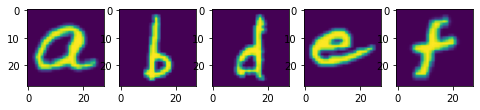

In [21]:

columns = 5
rows = 1
fig=plt.figure(figsize=(8, 8))
for i in range(36, columns*rows +36):
    img = bal_im_train[bal_y_train==i][np.random.randint(0,100)]
    fig.add_subplot(rows, columns, i-35)
    plt.imshow(img)
plt.show()
 

Reshape images to vectors

In [3]:
#digit vectors
dig_X_train = dig_im_train[:].reshape(dig_im_train.shape[0],dig_im_train.shape[1]**2)
dig_X_test = dig_im_test[:].reshape(dig_im_test.shape[0],dig_im_test.shape[1]**2)
print(dig_X_train.shape, dig_X_test.shape)
#letter vectors
let_X_train = let_im_train[:].reshape(let_im_train.shape[0],let_im_train.shape[1]**2)
let_X_test = let_im_test[:].reshape(let_im_test.shape[0],let_im_test.shape[1]**2)
print(let_X_train.shape, let_X_test.shape)
#balanced vectors
bal_X_train = bal_im_train[:].reshape(bal_im_train.shape[0],bal_im_train.shape[1]**2)
bal_X_test = bal_im_test[:].reshape(bal_im_test.shape[0],bal_im_test.shape[1]**2)
print(bal_X_train.shape, bal_X_test.shape)

(240000, 784) (40000, 784)
(124800, 784) (20800, 784)
(112800, 784) (18800, 784)


## Classifiers

### Digits

In [4]:
#Multi-Class Classification
pipeline = Pipeline([('clf',MLPClassifier())])
# Define hyperparameter grid
param_grid = {'clf__hidden_layer_sizes':[(i,) for i in range(20,120,20)]}
dig_MLP_clf = GridSearchCV(
    pipeline, param_grid,verbose=3, cv = 2).fit(dig_X_train,dig_y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] clf__hidden_layer_sizes=(20,) ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... clf__hidden_layer_sizes=(20,), score=0.928, total= 8.2min
[CV] clf__hidden_layer_sizes=(20,) ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.2min remaining:    0.0s


[CV] ....... clf__hidden_layer_sizes=(20,), score=0.947, total=13.5min
[CV] clf__hidden_layer_sizes=(40,) ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 21.6min remaining:    0.0s


[CV] ....... clf__hidden_layer_sizes=(40,), score=0.954, total=25.8min
[CV] clf__hidden_layer_sizes=(40,) ...................................
[CV] ....... clf__hidden_layer_sizes=(40,), score=0.957, total=10.6min
[CV] clf__hidden_layer_sizes=(60,) ...................................
[CV] ....... clf__hidden_layer_sizes=(60,), score=0.965, total= 7.3min
[CV] clf__hidden_layer_sizes=(60,) ...................................
[CV] ....... clf__hidden_layer_sizes=(60,), score=0.968, total=17.4min
[CV] clf__hidden_layer_sizes=(80,) ...................................
[CV] ....... clf__hidden_layer_sizes=(80,), score=0.970, total= 6.1min
[CV] clf__hidden_layer_sizes=(80,) ...................................
[CV] ....... clf__hidden_layer_sizes=(80,), score=0.965, total=11.2min
[CV] clf__hidden_layer_sizes=(100,) ..................................
[CV] ...... clf__hidden_layer_sizes=(100,), score=0.968, total=18.4min
[CV] clf__hidden_layer_sizes=(100,) ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 128.2min finished


In [ ]:
# KNN plus HPO with GridSearch
pipeline = Pipeline([('clf',KNeighborsClassifier())])
# Define hyperparameter grid
param_grid = {'clf__hidden_layer_sizes':range(1,10)}
#GridSearchCV to perform HPO
dig_KNN_clf = GridSearchCV(
    pipeline, param_grid,verbose=3, cv = 2).fit(dig_X_train[:10000], dig_y_train[:10000])

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] clf__n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. clf__n_neighbors=1, score=0.933, total=  50.1s
[CV] clf__n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.0s remaining:    0.0s


[CV] .................. clf__n_neighbors=1, score=0.940, total=  47.6s
[CV] clf__n_neighbors=2 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s


[CV] .................. clf__n_neighbors=2, score=0.918, total=  47.6s
[CV] clf__n_neighbors=2 ..............................................
[CV] .................. clf__n_neighbors=2, score=0.926, total=  46.7s
[CV] clf__n_neighbors=3 ..............................................
[CV] .................. clf__n_neighbors=3, score=0.932, total=  46.5s
[CV] clf__n_neighbors=3 ..............................................
[CV] .................. clf__n_neighbors=3, score=0.940, total=  44.1s
[CV] clf__n_neighbors=4 ..............................................
[CV] .................. clf__n_neighbors=4, score=0.926, total=  47.7s
[CV] clf__n_neighbors=4 ..............................................
[CV] .................. clf__n_neighbors=4, score=0.934, total=  45.8s
[CV] clf__n_neighbors=5 ..............................................
[CV] .................. clf__n_neighbors=5, score=0.928, total=  49.1s
[CV] clf__n_neighbors=5 ..............................................
[CV] .

In [ ]:
print(dig_KNN_clf.best_estimator_)

Classification Report (MLP) - **Digits**

In [5]:
with open('dig_MLP_clf.pickle', 'rb') as f:
    dig_MLP_clf = pk.load(f)
dig_y_pred = dig_MLP_clf.predict(dig_X_test)
print(classification_report(dig_y_test, dig_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4000
           1       1.00      0.98      0.99      4000
           2       0.97      0.98      0.97      4000
           3       0.95      0.97      0.96      4000
           4       0.97      0.98      0.97      4000
           5       0.98      0.96      0.97      4000
           6       0.97      0.98      0.98      4000
           7       0.98      0.98      0.98      4000
           8       0.97      0.95      0.96      4000
           9       0.97      0.96      0.97      4000

    accuracy                           0.97     40000
   macro avg       0.97      0.97      0.97     40000
weighted avg       0.97      0.97      0.97     40000



Classification Report (KNN) - **Digits**

In [8]:
with open('dig_KNN_clf.pickle', 'rb') as f:
    dig_KNN_clf = pk.load(f)
dig_y_pred = dig_KNN_clf.predict(dig_X_test[:500])
print(classification_report(dig_y_test[:500], dig_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        64
           1       0.90      1.00      0.95        45
           2       1.00      0.91      0.95        43
           3       0.93      0.95      0.94        59
           4       0.98      0.95      0.96        42
           5       0.90      0.95      0.92        64
           6       0.93      0.96      0.94        53
           7       0.86      0.98      0.91        43
           8       0.92      0.83      0.87        41
           9       1.00      0.85      0.92        46

    accuracy                           0.93       500
   macro avg       0.94      0.93      0.93       500
weighted avg       0.94      0.93      0.93       500



In [3]:
with open('dig_MLP_clf.pickle', 'wb') as f:
    pk.dump(dig_MLP_clf,f)
with open('dig_KNN_clf.pickle', 'wb') as f:
    pk.dump(dig_KNN_clf,f)

NameError: name 'dig_MLP_clf' is not defined

### Letters

In [5]:
#Multi-Class Classification
let_MLP_clf = MLPClassifier(random_state=1, max_iter=300).fit(let_X_train, let_y_train)
with open('let_MLP_clf.pickle', 'wb') as f:
    pk.dump(let_MLP_clf,f)

In [6]:
# KNN plus HPO with GridSearch
pipeline = Pipeline([('clf',KNeighborsClassifier())])
# Define hyperparameter grid
param_grid = {'clf__n_neighbors':range(1,10)}
#GridSearchCV to perform HPO pipeline
let_KNN_clf = GridSearchCV(pipeline, param_grid,verbose=3, cv = 2).fit(let_X_train[:10000], let_y_train[:10000])
with open('let_KNN_clf.pickle', 'wb') as f:
    pk.dump(let_KNN_clf,f)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] clf__n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. clf__n_neighbors=1, score=0.717, total=  50.7s
[CV] clf__n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.6s remaining:    0.0s


[CV] .................. clf__n_neighbors=1, score=0.725, total=  55.9s
[CV] clf__n_neighbors=2 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s


[CV] .................. clf__n_neighbors=2, score=0.691, total=  50.6s
[CV] clf__n_neighbors=2 ..............................................
[CV] .................. clf__n_neighbors=2, score=0.694, total=  49.8s
[CV] clf__n_neighbors=3 ..............................................
[CV] .................. clf__n_neighbors=3, score=0.717, total=  55.1s
[CV] clf__n_neighbors=3 ..............................................
[CV] .................. clf__n_neighbors=3, score=0.722, total=  50.2s
[CV] clf__n_neighbors=4 ..............................................
[CV] .................. clf__n_neighbors=4, score=0.715, total=  55.6s
[CV] clf__n_neighbors=4 ..............................................
[CV] .................. clf__n_neighbors=4, score=0.719, total=  55.2s
[CV] clf__n_neighbors=5 ..............................................
[CV] .................. clf__n_neighbors=5, score=0.716, total=  58.1s
[CV] clf__n_neighbors=5 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 16.6min finished


Classification Report (MLP) - **letters**

In [8]:
let_y_pred = let_MLP_clf.predict(let_X_test)
print(classification_report(let_y_test, let_y_pred))

              precision    recall  f1-score   support

           1       0.58      0.70      0.64       800
           2       0.85      0.78      0.82       800
           3       0.87      0.86      0.86       800
           4       0.73      0.81      0.77       800
           5       0.83      0.81      0.82       800
           6       0.81      0.85      0.83       800
           7       0.63      0.63      0.63       800
           8       0.79      0.71      0.75       800
           9       0.63      0.71      0.67       800
          10       0.95      0.78      0.85       800
          11       0.66      0.86      0.75       800
          12       0.65      0.67      0.66       800
          13       0.91      0.87      0.89       800
          14       0.80      0.70      0.75       800
          15       0.83      0.90      0.86       800
          16       0.87      0.88      0.88       800
          17       0.61      0.60      0.61       800
          18       0.83    

Classification Report (KNN) - **letters**

In [14]:
let_y_pred = let_KNN_clf.predict(let_X_test)
print(classification_report(let_y_test, let_y_pred))

              precision    recall  f1-score   support

           1       0.75      0.72      0.74       800
           2       0.85      0.64      0.73       800
           3       0.74      0.87      0.80       800
           4       0.88      0.72      0.79       800
           5       0.79      0.79      0.79       800
           6       0.82      0.70      0.75       800
           7       0.69      0.51      0.59       800
           8       0.73      0.78      0.75       800
           9       0.53      0.63      0.58       800
          10       0.76      0.82      0.79       800
          11       0.86      0.70      0.77       800
          12       0.44      0.63      0.52       800
          13       0.94      0.91      0.93       800
          14       0.77      0.79      0.78       800
          15       0.74      0.95      0.83       800
          16       0.79      0.85      0.82       800
          17       0.71      0.50      0.59       800
          18       0.72    

## Balanced Dataset

In [75]:
#Multi-Class Classification
bal_MLP_clf = MLPClassifier(random_state=1, max_iter=300).fit(bal_X_train, bal_y_train)

In [76]:
with open('bal_MLP_clf.pickle', 'wb') as f:
    pk.dump(bal_MLP_clf,f)

In [77]:
# KNN plus HPO with GridSearch
pipeline = Pipeline([('clf',KNeighborsClassifier())])
# Define hyperparameter grid
param_grid = {'clf__n_neighbors':range(1,10)}
#GridSearchCV to perform HPO pipeline
bal_KNN_clf = GridSearchCV(pipeline, param_grid,verbose=3, cv = 2).fit(bal_X_train[:10000], bal_y_train[:10000])

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] clf__n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. clf__n_neighbors=1, score=0.625, total= 1.2min
[CV] clf__n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] .................. clf__n_neighbors=1, score=0.634, total= 1.1min
[CV] clf__n_neighbors=2 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.4min remaining:    0.0s


[CV] .................. clf__n_neighbors=2, score=0.599, total= 1.2min
[CV] clf__n_neighbors=2 ..............................................
[CV] .................. clf__n_neighbors=2, score=0.595, total= 1.2min
[CV] clf__n_neighbors=3 ..............................................
[CV] .................. clf__n_neighbors=3, score=0.611, total= 1.2min
[CV] clf__n_neighbors=3 ..............................................
[CV] .................. clf__n_neighbors=3, score=0.623, total= 1.0min
[CV] clf__n_neighbors=4 ..............................................
[CV] .................. clf__n_neighbors=4, score=0.617, total= 1.1min
[CV] clf__n_neighbors=4 ..............................................
[CV] .................. clf__n_neighbors=4, score=0.634, total= 1.0min
[CV] clf__n_neighbors=5 ..............................................
[CV] .................. clf__n_neighbors=5, score=0.622, total= 1.1min
[CV] clf__n_neighbors=5 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 18.9min finished


In [78]:
with open('bal_KNN_clf.pickle', 'wb') as f:
    pk.dump(bal_KNN_clf,f)

Classification Report (MLP) - ***Balanced Dataset***

In [79]:
bal_y_pred = bal_MLP_clf.predict(bal_X_test)
print(classification_report(bal_y_test, bal_y_pred))

              precision    recall  f1-score   support

           0       0.49      0.70      0.58       400
           1       0.54      0.41      0.47       400
           2       0.71      0.72      0.72       400
           3       0.91      0.72      0.81       400
           4       0.62      0.66      0.64       400
           5       0.56      0.79      0.66       400
           6       0.70      0.74      0.72       400
           7       0.90      0.89      0.90       400
           8       0.63      0.64      0.63       400
           9       0.57      0.42      0.48       400
          10       0.54      0.78      0.64       400
          11       0.79      0.61      0.69       400
          12       0.74      0.76      0.75       400
          13       0.80      0.55      0.65       400
          14       0.83      0.75      0.79       400
          15       0.53      0.50      0.51       400
          16       0.62      0.81      0.70       400
          17       0.78    

Classification Report (KNN) - ***Balanced Dataset***

In [80]:
bal_y_pred = bal_KNN_clf.predict(bal_X_test)
print(classification_report(bal_y_test, bal_y_pred))

              precision    recall  f1-score   support

           0       0.45      0.58      0.51       400
           1       0.32      0.49      0.39       400
           2       0.75      0.69      0.72       400
           3       0.77      0.88      0.82       400
           4       0.70      0.64      0.67       400
           5       0.72      0.58      0.64       400
           6       0.76      0.81      0.79       400
           7       0.81      0.93      0.87       400
           8       0.74      0.67      0.71       400
           9       0.49      0.64      0.55       400
          10       0.85      0.64      0.73       400
          11       0.79      0.46      0.58       400
          12       0.68      0.86      0.76       400
          13       0.79      0.57      0.66       400
          14       0.83      0.73      0.78       400
          15       0.43      0.40      0.42       400
          16       0.84      0.61      0.71       400
          17       0.80    